In [29]:
#pip install pyEDFlib

In [30]:
import pandas as pd
import numpy as np
from pyedflib import highlevel
import matplotlib.pyplot as plt
import json
import datetime

In [31]:
signals, signal_headers, header = highlevel.read_edf('pat00001.edf')
print(signal_headers[0]['sample_rate']) # prints 256


Reading Channels: 100%|██████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 2000.54it/s]

500


In [32]:
print(header)

{'technician': '', 'recording_additional': '', 'patientname': '', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': '', 'startdate': datetime.datetime(1999, 1, 1, 0, 0), 'birthdate': '', 'annotations': []}


In [33]:
print(len(signal_headers))

12


In [34]:
print(signal_headers)

[{'label': 'ECG I-Ref', 'dimension': 'mV', 'sample_rate': 500, 'physical_max': 12.0, 'physical_min': -12.0, 'digital_max': 12000, 'digital_min': -12000, 'prefilter': 'NF:off', 'transducer': ''}, {'label': 'ECG II-Ref', 'dimension': 'mV', 'sample_rate': 500, 'physical_max': 12.0, 'physical_min': -12.0, 'digital_max': 12000, 'digital_min': -12000, 'prefilter': 'NF:off', 'transducer': ''}, {'label': 'ECG III-Ref', 'dimension': 'mV', 'sample_rate': 500, 'physical_max': 12.0, 'physical_min': -12.0, 'digital_max': 12000, 'digital_min': -12000, 'prefilter': 'NF:off', 'transducer': ''}, {'label': 'ECG AVR-Ref', 'dimension': 'mV', 'sample_rate': 500, 'physical_max': 12.0, 'physical_min': -12.0, 'digital_max': 12000, 'digital_min': -12000, 'prefilter': 'NF:off', 'transducer': ''}, {'label': 'ECG AVL-Ref', 'dimension': 'mV', 'sample_rate': 500, 'physical_max': 12.0, 'physical_min': -12.0, 'digital_max': 12000, 'digital_min': -12000, 'prefilter': 'NF:off', 'transducer': ''}, {'label': 'ECG AVF-Ref

In [35]:
print(signals)

[[ 0.     0.     0.    ...  0.17   0.17   0.   ]
 [ 0.    -0.01  -0.02  ... -0.43  -0.43   0.   ]
 [ 0.    -0.01  -0.02  ... -0.6   -0.6    0.   ]
 ...
 [ 0.    -0.02  -0.04  ... -0.25  -0.25   0.   ]
 [ 0.    -0.035 -0.07  ... -0.58  -0.58   0.   ]
 [ 0.    -0.025 -0.05  ... -0.66  -0.66   0.   ]]


In [36]:
signals.shape


(12, 5000)

In [37]:
data = pd.DataFrame()
for i in range(len(signal_headers)):
    data[signal_headers[i]['label']] = pd.Series(signals[i])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ECG I-Ref    5000 non-null   float64
 1   ECG II-Ref   5000 non-null   float64
 2   ECG III-Ref  5000 non-null   float64
 3   ECG AVR-Ref  5000 non-null   float64
 4   ECG AVL-Ref  5000 non-null   float64
 5   ECG AVF-Ref  5000 non-null   float64
 6   ECG V1-Ref   5000 non-null   float64
 7   ECG V2-Ref   5000 non-null   float64
 8   ECG V3-Ref   5000 non-null   float64
 9   ECG V4-Ref   5000 non-null   float64
 10  ECG V5-Ref   5000 non-null   float64
 11  ECG V6-Ref   5000 non-null   float64
dtypes: float64(12)
memory usage: 468.9 KB


In [39]:
data.head()

,ECG I-Ref,ECG II-Ref,ECG III-Ref,ECG AVR-Ref,ECG AVL-Ref,ECG AVF-Ref,ECG V1-Ref,ECG V2-Ref,ECG V3-Ref,ECG V4-Ref,ECG V5-Ref,ECG V6-Ref
0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
1,0.00,-0.010,-0.010,0.005,0.000,-0.005,0.005,-0.025,-0.02,-0.020,-0.035,-0.025
2,0.00,-0.020,-0.020,0.010,0.000,-0.010,0.010,-0.050,-0.04,-0.040,-0.070,-0.050
3,-0.01,-0.025,-0.015,0.020,-0.005,-0.015,0.015,-0.050,-0.05,-0.055,-0.085,-0.060
4,-0.02,-0.030,-0.010,0.030,-0.010,-0.020,0.020,-0.050,-0.06,-0.070,-0.100,-0.070


In [40]:
data.columns = ['ECG_I','ECG_II','ECG_III','ECG_AVR','ECG_AVL','ECG_AVF','ECG_V1','ECG_V2','ECG_V3','ECG_V4','ECG_V5','ECG_V6']

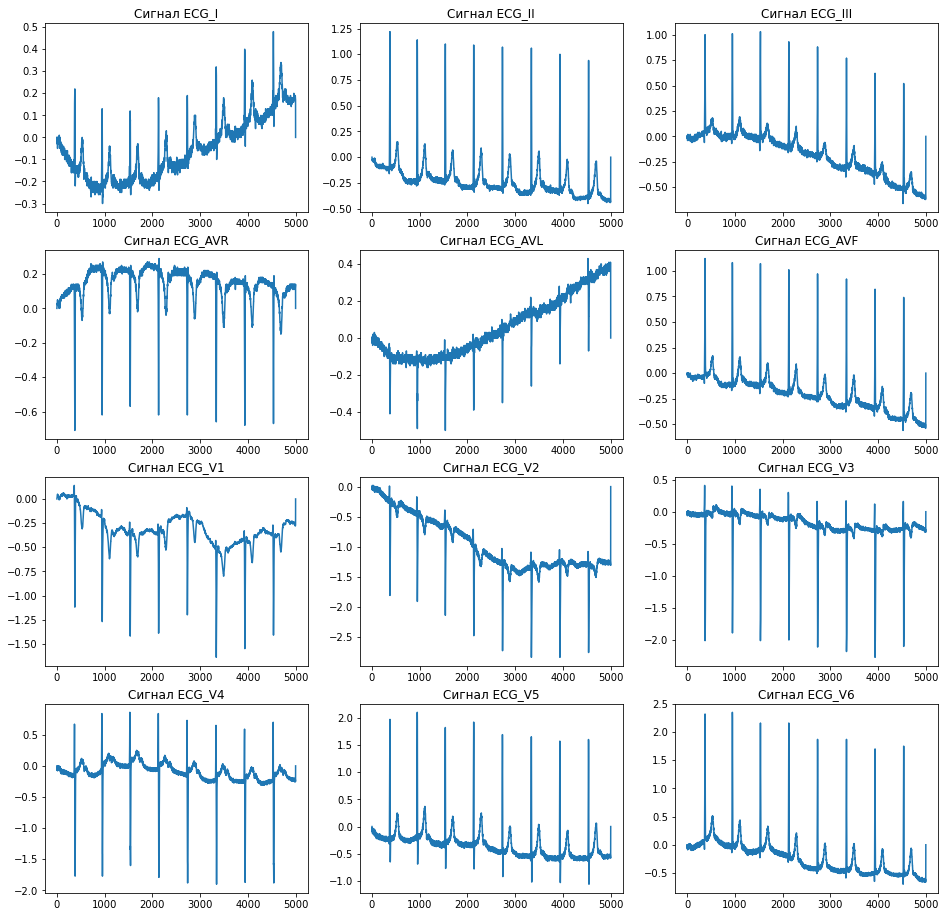

In [41]:
fig = plt.figure(figsize=(16,16))

for i, signal in enumerate(data.columns):
    ax = fig.add_subplot(4, 3, i+1)
    plt.plot(data[signal])
    ax.set_title('Сигнал ' + signal)
    #ax.set_xlabel('samples')
plt.show()

In [42]:
header['startdate'] = str(header['startdate'])
signals = signals.tolist()
#signals_d = {'signals':signals}
#print(signals_d)
print(signals)

[[0.0, 0.0, 0.0, -0.01, -0.02, -0.025, -0.03, -0.02, -0.01, -0.005, 0.0, -0.005, -0.01, -0.03, -0.05, -0.045, -0.04, -0.035, -0.03, -0.015, 0.0, -0.01, -0.02, -0.025, -0.03, -0.03, -0.03, -0.02, -0.01, -0.01, -0.01, -0.02, -0.03, -0.03, -0.03, -0.03, -0.03, -0.015, 0.0, -0.005, -0.01, -0.02, -0.03, -0.03, -0.03, -0.025, -0.02, -0.005, 0.01, 0.01, 0.01, 0.0, -0.01, -0.02, -0.03, -0.025, -0.02, -0.01, 0.0, 0.0, 0.0, -0.015, -0.03, -0.04, -0.05, -0.045, -0.04, -0.02, 0.0, -0.015, -0.03, -0.03, -0.03, -0.035, -0.04, -0.04, -0.04, -0.035, -0.03, -0.025, -0.02, -0.035, -0.05, -0.055, -0.06, -0.055, -0.05, -0.04, -0.03, -0.03, -0.03, -0.035, -0.04, -0.05, -0.06, -0.065, -0.07, -0.055, -0.04, -0.035, -0.03, -0.04, -0.05, -0.055, -0.06, -0.06, -0.06, -0.05, -0.04, -0.04, -0.04, -0.05, -0.06, -0.07, -0.08, -0.07, -0.06, -0.05, -0.04, -0.045, -0.05, -0.055, -0.06, -0.065, -0.07, -0.075, -0.08, -0.065, -0.05, -0.05, -0.05, -0.055, -0.06, -0.07, -0.08, -0.08, -0.08, -0.06, -0.04, -0.045, -0.05, -0.

In [43]:
print(len(signals))

12


In [44]:
signals_d = {}
for label, signal in zip(data.columns, signals):
    signals_d[label] = signal

In [45]:
print(len(signals_d))

12


In [46]:
print(signals_d)

{'ECG_I': [0.0, 0.0, 0.0, -0.01, -0.02, -0.025, -0.03, -0.02, -0.01, -0.005, 0.0, -0.005, -0.01, -0.03, -0.05, -0.045, -0.04, -0.035, -0.03, -0.015, 0.0, -0.01, -0.02, -0.025, -0.03, -0.03, -0.03, -0.02, -0.01, -0.01, -0.01, -0.02, -0.03, -0.03, -0.03, -0.03, -0.03, -0.015, 0.0, -0.005, -0.01, -0.02, -0.03, -0.03, -0.03, -0.025, -0.02, -0.005, 0.01, 0.01, 0.01, 0.0, -0.01, -0.02, -0.03, -0.025, -0.02, -0.01, 0.0, 0.0, 0.0, -0.015, -0.03, -0.04, -0.05, -0.045, -0.04, -0.02, 0.0, -0.015, -0.03, -0.03, -0.03, -0.035, -0.04, -0.04, -0.04, -0.035, -0.03, -0.025, -0.02, -0.035, -0.05, -0.055, -0.06, -0.055, -0.05, -0.04, -0.03, -0.03, -0.03, -0.035, -0.04, -0.05, -0.06, -0.065, -0.07, -0.055, -0.04, -0.035, -0.03, -0.04, -0.05, -0.055, -0.06, -0.06, -0.06, -0.05, -0.04, -0.04, -0.04, -0.05, -0.06, -0.07, -0.08, -0.07, -0.06, -0.05, -0.04, -0.045, -0.05, -0.055, -0.06, -0.065, -0.07, -0.075, -0.08, -0.065, -0.05, -0.05, -0.05, -0.055, -0.06, -0.07, -0.08, -0.08, -0.08, -0.06, -0.04, -0.045, -

In [48]:
#ECG = {'header': header,'signal_headers':signal_headers,'signals':signals}
ECG = {'header': header,'signal_headers':signal_headers}

In [101]:
with open("ECG00001_headers.json", "w") as file:
    json.dump(ECG, file)

In [102]:
with open("ECG00001_signals.json", "w") as file:
    json.dump(signals_d, file)

In [123]:
data.to_csv('ECG00001_signals.csv')